Importing dependencies

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Importing csv data file
credit_card_data = pd.read_csv(r"E:\akshit study\Data Science\finddefault-(prediction-of-credit-card-fraud)\data\creditcard - working_data.csv")

In [3]:
# print first 5 rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# print last 5 rows
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Data Preprocessing
credit_card_data['Time'] = pd.to_datetime(credit_card_data['Time'])  # Convert 'Time' column to datetime datatype

In [6]:
# print first 5 rows
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1970-01-01 00:00:00.000000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1970-01-01 00:00:00.000000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1970-01-01 00:00:00.000000001,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1970-01-01 00:00:00.000000001,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1970-01-01 00:00:00.000000002,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    284807 non-null  datetime64[ns]
 1   V1      284807 non-null  float64       
 2   V2      284807 non-null  float64       
 3   V3      284807 non-null  float64       
 4   V4      284807 non-null  float64       
 5   V5      284807 non-null  float64       
 6   V6      284807 non-null  float64       
 7   V7      284807 non-null  float64       
 8   V8      284807 non-null  float64       
 9   V9      284807 non-null  float64       
 10  V10     284807 non-null  float64       
 11  V11     284807 non-null  float64       
 12  V12     284807 non-null  float64       
 13  V13     284807 non-null  float64       
 14  V14     284807 non-null  float64       
 15  V15     284807 non-null  float64       
 16  V16     284807 non-null  float64       
 17  V17     284807 non-null  floa

In [8]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# distribution of legit transaction and fraudulent transaction
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Define features (X) and target variable (y)
X = credit_card_data.drop(['Class'], axis=1)  # Features
y = credit_card_data['Class']  # Target variable

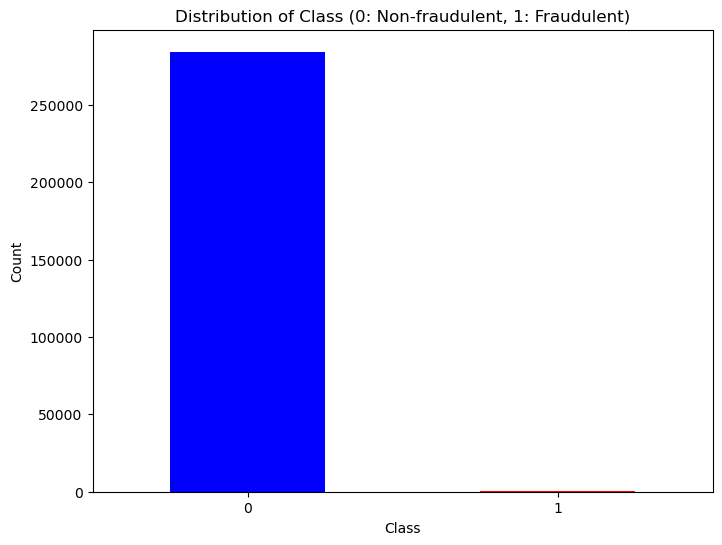

In [12]:
# Visualize the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

This bar chart shows the data is  heavily imbalanced. The majority of the transactions are Non-Fraudulent (class 0), and only a small fraction of them are fraudulent (class 1). This indicates that the dataset has a class imbalance issue, which could potentially affect the performance of a model trained on this dataset.

In [13]:
# seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [14]:
print(legit)

                                Time         V1         V2        V3  \
0      1970-01-01 00:00:00.000000000  -1.359807  -0.072781  2.536347   
1      1970-01-01 00:00:00.000000000   1.191857   0.266151  0.166480   
2      1970-01-01 00:00:00.000000001  -1.358354  -1.340163  1.773209   
3      1970-01-01 00:00:00.000000001  -0.966272  -0.185226  1.792993   
4      1970-01-01 00:00:00.000000002  -1.158233   0.877737  1.548718   
...                              ...        ...        ...       ...   
284802 1970-01-01 00:00:00.000172786 -11.881118  10.071785 -9.834783   
284803 1970-01-01 00:00:00.000172787  -0.732789  -0.055080  2.035030   
284804 1970-01-01 00:00:00.000172788   1.919565  -0.301254 -3.249640   
284805 1970-01-01 00:00:00.000172788  -0.240440   0.530483  0.702510   
284806 1970-01-01 00:00:00.000172792  -0.533413  -0.189733  0.703337   

              V4        V5        V6        V7        V8        V9  ...  \
0       1.378155 -0.338321  0.462388  0.239599  0.098698  0.

In [15]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [16]:
# statistical measures
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,1970-01-01 00:00:00.000094838,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,1970-01-01 00:00:00.000080746,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

The data is unbalanced so we will build a sample dataset containing similar distribution of legit transaction and fraudulent transaction.
Legit transactions = 284315
Fraudulent transactions = 492

In [19]:
legit_sample = legit.sample(n=492)

In [20]:
print(legit_sample)

                                Time        V1        V2        V3        V4  \
268168 1970-01-01 00:00:00.000163092  2.145245  0.039356 -1.660194  0.114912   
262722 1970-01-01 00:00:00.000160622 -0.640651  0.463373  1.349643 -0.533871   
148042 1970-01-01 00:00:00.000089311 -3.864207 -2.552884  1.845916 -0.209368   
9769   1970-01-01 00:00:00.000014488 -1.102539 -0.300842  1.689552  2.035351   
133982 1970-01-01 00:00:00.000080596 -2.494193 -0.070723  1.010491  0.318335   
...                              ...       ...       ...       ...       ...   
143249 1970-01-01 00:00:00.000085218  0.722854 -1.466941  0.485325  0.643955   
66456  1970-01-01 00:00:00.000052063  0.997170 -0.043427 -0.119059  0.679101   
111978 1970-01-01 00:00:00.000072459 -2.358024 -1.105940  2.868858  1.618771   
98649  1970-01-01 00:00:00.000066749 -1.333651 -0.141828  2.124477 -0.427997   
145406 1970-01-01 00:00:00.000086918  0.044644  1.214578 -1.763385  1.041899   

              V5        V6        V7   

In [21]:
# concatenate two dataframes
new_dataset = pd.concat([legit_sample, fraud], axis =0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
268168,1970-01-01 00:00:00.000163092,2.145245,0.039356,-1.660194,0.114912,0.526238,-0.713262,0.261844,-0.387745,0.533761,...,0.204016,0.822409,-0.141892,-0.934021,0.431554,-0.043192,-0.009940,-0.065665,1.00,0
262722,1970-01-01 00:00:00.000160622,-0.640651,0.463373,1.349643,-0.533871,0.208325,-0.751100,0.258893,-0.187684,0.386276,...,-0.073080,-0.033336,-0.035634,0.082830,-0.925711,-0.316660,0.013676,0.193267,14.90,0
148042,1970-01-01 00:00:00.000089311,-3.864207,-2.552884,1.845916,-0.209368,1.036844,-0.211099,0.648589,-0.637620,1.727469,...,-0.618919,0.196349,0.865851,0.614709,0.658447,0.433145,-0.901892,0.970250,114.71,0
9769,1970-01-01 00:00:00.000014488,-1.102539,-0.300842,1.689552,2.035351,0.408256,-0.006452,-1.120499,0.066055,1.831914,...,-0.134786,0.487382,-0.347842,0.006170,-1.528151,-0.445257,0.258997,0.143692,47.32,0
133982,1970-01-01 00:00:00.000080596,-2.494193,-0.070723,1.010491,0.318335,0.799905,-1.188726,0.660097,-0.297833,0.507235,...,-0.687572,-0.355734,1.123420,0.359041,0.182692,0.134648,0.667551,-0.015526,8.99,0


In [23]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,1970-01-01 00:00:00.000169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1970-01-01 00:00:00.000169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,1970-01-01 00:00:00.000169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,1970-01-01 00:00:00.000169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,1970-01-01 00:00:00.000170348,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [24]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [25]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,1970-01-01 00:00:00.000095883,0.034532,0.131897,0.036450,-0.020298,-0.058499,-0.000646,-0.015900,-0.025674,0.004153,...,0.011576,-0.036551,0.012490,0.037125,-0.011481,-0.007019,0.014048,-0.029092,-0.015662,72.442846
1,1970-01-01 00:00:00.000080746,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features and targets

In [26]:
X= new_dataset.drop(columns="Class", axis=1)
Y= new_dataset["Class"]

In [27]:
print(X)

                                Time        V1        V2        V3        V4  \
268168 1970-01-01 00:00:00.000163092  2.145245  0.039356 -1.660194  0.114912   
262722 1970-01-01 00:00:00.000160622 -0.640651  0.463373  1.349643 -0.533871   
148042 1970-01-01 00:00:00.000089311 -3.864207 -2.552884  1.845916 -0.209368   
9769   1970-01-01 00:00:00.000014488 -1.102539 -0.300842  1.689552  2.035351   
133982 1970-01-01 00:00:00.000080596 -2.494193 -0.070723  1.010491  0.318335   
...                              ...       ...       ...       ...       ...   
279863 1970-01-01 00:00:00.000169142 -1.927883  1.125653 -4.518331  1.749293   
280143 1970-01-01 00:00:00.000169347  1.378559  1.289381 -5.004247  1.411850   
280149 1970-01-01 00:00:00.000169351 -0.676143  1.126366 -2.213700  0.468308   
281144 1970-01-01 00:00:00.000169966 -3.113832  0.585864 -5.399730  1.817092   
281674 1970-01-01 00:00:00.000170348  1.991976  0.158476 -2.583441  0.408670   

              V5        V6        V7   

In [28]:
print(Y)

268168    0
262722    0
148042    0
9769      0
133982    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


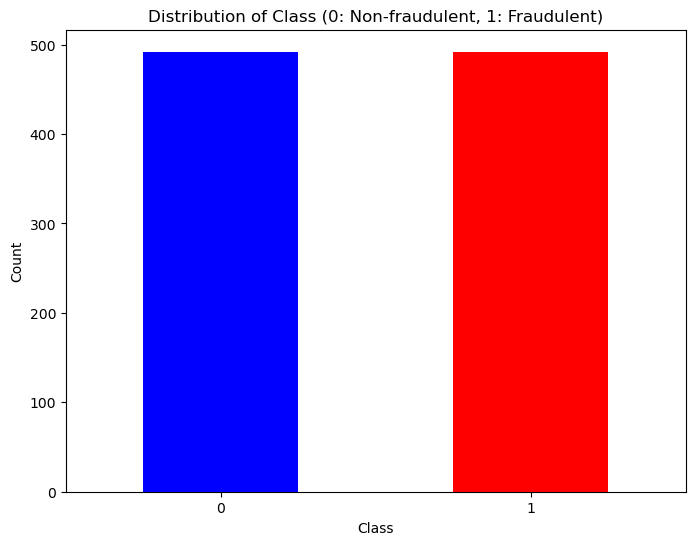

In [65]:
# Visualize the distribution of 'Class' (target variable)
plt.figure(figsize=(8, 6))
Y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Class (0: Non-fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [38]:
# Feature Engineering
# Add new features
X['Transaction_hour'] = pd.to_datetime(X['Time'], unit='s').dt.hour
X['Normalized_amount'] = (X['Amount'] - X['Amount'].mean()) / X['Amount'].std()

X = X.drop(['Time'], axis=1)

Split the data into training data and testing data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify= Y, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(984, 31) (787, 31) (197, 31)


Model training

Logistic Regression

In [41]:
model = LogisticRegression()

In [42]:
# training the logistic regression with training data
model.fit(X_train, Y_train)

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 64, in _check_solver
    raise Va

Model Evalutaion


In [54]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [55]:
print('Accuracy on training data:' , training_data_accuracy)

Accuracy on training data: 0.9580686149936467


In [56]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [57]:
print('Accuracy score on test data: ',test_data_accuracy)

Accuracy score on test data:  0.9390862944162437


Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 64, in _check_solver
    raise Va